# Task

Task for today : dataset - https://archive.ics.uci.edu/ml/datasets/Bag+of+Words

Q1 = try to find out a count of each and every word in a respective file return a list of tuple with word and its respective count
sample example - [('sudh', 6 ) , ('kumar',3)]

Q2 = try to perform a reduce operation to get a count of all the word starting with same alphabet
sample examle = [(a,56) , (b,34),...........]

Q3 = Try to filter out all the words from dataset .
.001.abstract = abstract =.002 = delete

Q4 = create a tuple set of all the records avaialble in all the five file and then store it in sqllite DB .
(aah,>=,354,fdsf,wer)

# Data Analysis :-

### Each Text Collection has :-

1. D is the number of documents
2. W is the number of words in the vocabulary
3. N is the total number of words in the collection

### Five Text Collections :-

1. Enron
2. NIPS
3. KOS
4. NYTimes
5. PubMed

### Five Text Collections :-

#### 1. Enron Emails :-
    1.1. D=39861
    1.2. W=28102
    1.3. N=6,400,000 (approx)

#### 2. NIPS full papers :-
    2.1. D=1500
    2.2. W=12419
    2.3. N=1,900,000 (approx)

#### 3. KOS blog entries :-
    3.1. D=3430
    3.2. W=6906
    3.3. N=467714

#### 4. NYTimes news articles:
    4.1. D=300000
    4.2. W=102660
    4.3. N=100,000,000 (approx)

#### 5. PubMed abstracts:
    5.1. D=8200000
    5.2. W=141043
    5.3. N=730,000,000 (approx)

In [2]:
import logging 

## Creating logging config

logging.basicConfig(filename='vocab_logfile.log',
                    filemode='a',
                    level = logging.INFO,
                    format='%(asctime)s %(levelname)s-%(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S'
                    )

## Creating Logger Object
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

## Task 1 :-
### Q1 = try to find out a count of each and every word in a respective file return a list of tuple with word and its respective count
sample example - [('sudh', 6 ) , ('kumar',3)]

In [3]:
import csv

def wordCount(*args):
    """
    wordCount(file1, file2, ... filen)
    wordCount(*args)

    This function take file(s) as argument and return word with occurence count.

    :param:
        *args: file(s).
    :return: ('word', count(word)) : list(tuples)
    """
    words = []
    
    try:
        for file in args:
            with open(file, 'r', encoding="utf8") as f:
                data = csv.reader(f)
                for row_data in data:
                    words.append(row_data[0])
    except Exception as e:
        logger.error('Error in reading files: ' + str(e))
    else:
        word_count = []
        unique_words = list(set(words))
        unique_words.sort()

        for i in unique_words:
            word_count.append((i, words.count(i)))
            #yield (i, words.count(i))
        logger.info('Word count for records: ' +  str(len(word_count)) + ' from ' + str(len(args)) + 'Datasets')
        
        return word_count

### Feteching records for data 'vocab.enron.txt' and 'vocab.kos.txt'

In [4]:
task1 = wordCount('vocab.enron.txt', 'vocab.kos.txt')

### Feteching top 20 data

In [5]:
task1[0:20]

[('aaa', 1),
 ('aaas', 1),
 ('aactive', 1),
 ('aadvantage', 1),
 ('aaker', 1),
 ('aap', 1),
 ('aapg', 1),
 ('aaron', 1),
 ('aarp', 2),
 ('aas', 1),
 ('aau', 1),
 ('ab1890', 1),
 ('ab1x', 1),
 ('ab31x', 1),
 ('aba', 1),
 ('abacus', 1),
 ('abag', 1),
 ('abalone', 1),
 ('abandon', 2),
 ('abandoned', 2)]

## Task 2 :-
### Q2 = try to perform a reduce operation to get a count of all the word starting with same alphabet
sample examle = [(a,56) , (b,34),...........]

In [6]:
import csv

def wordCount_reduce(*args):
    """
    wordCount_reduce(file1, file2, ... filen)
    wordCount_reduce(*args)

    This function take file(s) as argument and return alphabets with occurence count.

    :param:
        *args: file(s).
    :return: ('alphabets', count(alphabets)) : list(tuples)
    """
    words = []
    
    try:
        for file in args:
            with open(file, 'r', encoding="utf8") as f:
                data = csv.reader(f)
                for row_data in data:
                    if row_data[0][0] >= 'a' and row_data[0][0] <= 'z' or row_data[0][0] >= 'A' and row_data[0][0] <= 'Z':
                        words.append(row_data[0][0])
                        
    except Exception as e:
        logger.error('Error in reading files: ' + str(e))
    
    else:
        word_count = []
        unique_words = list(set(words))
        unique_words.sort()


        for i in unique_words:
            word_count.append((i, words.count(i)))
        
        logger.info('Data record count : ' +  str(len(word_count)) + ' from ' + str(len(args)) + 'Datasets')
        
        return word_count

### Feteching records for data 'vocab.enron.txt' and 'vocab.kos.txt'

In [7]:
wordCount_reduce('vocab.enron.txt', 'vocab.pubmed.txt')

[('a', 12501),
 ('b', 7046),
 ('c', 15155),
 ('d', 8388),
 ('e', 7143),
 ('f', 5642),
 ('g', 5150),
 ('h', 7418),
 ('i', 7097),
 ('j', 933),
 ('k', 1855),
 ('l', 5716),
 ('m', 10734),
 ('n', 7647),
 ('o', 4026),
 ('p', 15247),
 ('q', 634),
 ('r', 7620),
 ('s', 13603),
 ('t', 8447),
 ('u', 2908),
 ('v', 2784),
 ('w', 2289),
 ('x', 425),
 ('y', 412),
 ('z', 477)]

## Task 3 :-
### Q3 = Try to filter out all the words from dataset .
.001.abstract = abstract =.002 = delete

In [8]:
import csv

def filter_word(*args):
    """
    filter_word(file1, file2, ... filen)
    filter_word(*args)

    This function take file(s) as argument extract only the letters and return  as list.

    :param:
        *args: file(s).
    :return: ('characters') : list(strings)
    """
    words = []
    
    try:
        for file in args:
            with open(file, 'r', encoding="utf8") as f:
                data = csv.reader(f)
                for row_data in data:
                    current_word = ""
                    for char in row_data[0]:
                        if char >= 'a' and char <= 'z' or char[0][0] >= 'A' and char[0][0] <= 'Z':
                            current_word += char
                    words.append(current_word)

    except Exception as e:
        logger.error('Error in reading files: ' + str(e))
        
    else:
        alpha = []
        unique_words = list(set(words))
        unique_words.sort()


        for i in unique_words:
             #yield (i)
            if len(i) > 0:
                alpha.append(i)
                
        logger.info('Total filter records: ' +  str(len(alpha)) + ' from ' + str(len(args)) + 'Datasets')
        
        return alpha

### Feteching records for data 'vocab.pubmed.txt'

In [9]:
filter_words = filter_word('vocab.pubmed.txt')

#### Fetching top 10 records

In [10]:
filter_words[:10]

['a',
 'aa',
 'aaa',
 'aaaa',
 'aaad',
 'aaamyloidosis',
 'aaar',
 'aaas',
 'aab',
 'aabb']

## Task 4 :-
### Q4 = create a tuple set of all the records avaialble in all the five file and then store it in sqllite DB .
(aah,>=,354,fdsf,wer)

#### Function to fetch records from n collections

In [11]:
import csv

def task4(*args):
    """
    task4(file1, file2, ... filen)
    task4(*args)

    This function take file(s) as argument and return list of list.

    :param:
        *args: file(s).
    :return: ('string') : list(strings)
    """
    combine_words = []
    try:
        for file in args:
            with open(file, 'r', encoding="utf8") as f:
                data = csv.reader(f)
                words = []
                for row_data in data:
                    words.append(row_data[0])
                combine_words.append(words)
    
    except Exception as e:
        logger.error('Error in reading files: ' + str(e))
    else:
        logger.info('Success Return of list of list')
                
        return combine_words

#### Fetching data from all 5 collections

In [12]:
file = task4('vocab.enron.txt', 'vocab.kos.txt', 'vocab.nips.txt', 'vocab.nytimes.txt', 'vocab.pubmed.txt')

#### Spliting the data into 5 parts

In [13]:
f1 = file[0]
f2 = file[1]
f3 = file[2]
f4 = file[3]
f5 = file[4]

#### Using zip function and create a final list for dumping data into SQLite

In [15]:
final_zip_list = list(zip(f1, f2, f3, f4, f5))

#### Preview of final list data to dump into the SQLite DB

In [16]:
final_zip_list[:15]

[('aaa', 'aarp', 'a2i', 'aah', '>='),
 ('aaas', 'abandon', 'aaa', 'aahed', '>>'),
 ('aactive', 'abandoned', 'aaai', 'aaron', '>>>'),
 ('aadvantage', 'abandoning', 'aapo', 'aback', '>/='),
 ('aaker', 'abb', 'aat', 'abacus', '->'),
 ('aap', 'abc', 'aazhang', 'abajo', '--'),
 ('aapg', 'abcs', 'abandonment', 'abalone', '-->'),
 ('aaron', 'abdullah', 'abbott', 'abandon', '-/-'),
 ('aarp', 'ability', 'abbreviated', 'abandoned', '-/+'),
 ('aas', 'aboard', 'abcde', 'abandoning', '/-'),
 ('aau', 'abortion', 'abe', 'abandonment', '/+-'),
 ('ab1890', 'abortions', 'abeles', 'abandono', '..'),
 ('ab1x', 'abraham', 'abi', 'abarnard', '...'),
 ('ab31x', 'abrams', 'abilistic', 'abashed', '+-'),
 ('aba', 'abroad', 'abilities', 'abate', '+/')]

#### SQLite Database and Table Creation

#### Dumping the above data into the Table

In [17]:
import sqlite3

try:
    db = sqlite3.connect('vocab_database.db')
    logger.info('Database Created: ' +  str(db))
    cursor = db.cursor()
    query = "CREATE TABLE main_table(file1 text, file2 text, file3 text, file4 text, file5 text)"
    cursor.execute(query)

    record_count = 0 
    for record in final_zip_list:
        query = "INSERT INTO main_table VALUES {}".format(tuple(record))
        cursor.execute(query)
        record_count += 1
        
    db.commit()
    
    logger.info('Total records inserted: ' +  str(record_count))
        
except Exception as e:
    logger.error('Error: ' + str(e))
finally:
    db.close()

In [18]:
import sqlite3
db = sqlite3.connect('vocab_database.db')
cursor = db.cursor()

#### Fetching the top 20 records from SQLite Table

In [19]:
data = cursor.execute("select * from main_table limit 20")
[i for i in data]

[('aaa', 'aarp', 'a2i', 'aah', '>='),
 ('aaas', 'abandon', 'aaa', 'aahed', '>>'),
 ('aactive', 'abandoned', 'aaai', 'aaron', '>>>'),
 ('aadvantage', 'abandoning', 'aapo', 'aback', '>/='),
 ('aaker', 'abb', 'aat', 'abacus', '->'),
 ('aap', 'abc', 'aazhang', 'abajo', '--'),
 ('aapg', 'abcs', 'abandonment', 'abalone', '-->'),
 ('aaron', 'abdullah', 'abbott', 'abandon', '-/-'),
 ('aarp', 'ability', 'abbreviated', 'abandoned', '-/+'),
 ('aas', 'aboard', 'abcde', 'abandoning', '/-'),
 ('aau', 'abortion', 'abe', 'abandonment', '/+-'),
 ('ab1890', 'abortions', 'abeles', 'abandono', '..'),
 ('ab1x', 'abraham', 'abi', 'abarnard', '...'),
 ('ab31x', 'abrams', 'abilistic', 'abashed', '+-'),
 ('aba', 'abroad', 'abilities', 'abate', '+/'),
 ('abacus', 'absence', 'ability', 'abated', '+/--'),
 ('abag', 'absent', 'abl', 'abatement', '+/?'),
 ('abalone', 'absentee', 'able', 'abating', '+/+'),
 ('abandon', 'absolute', 'ables', 'abbey', '++'),
 ('abandoned', 'absolutely', 'ablex', 'abbot', '+++')]

### Log File 

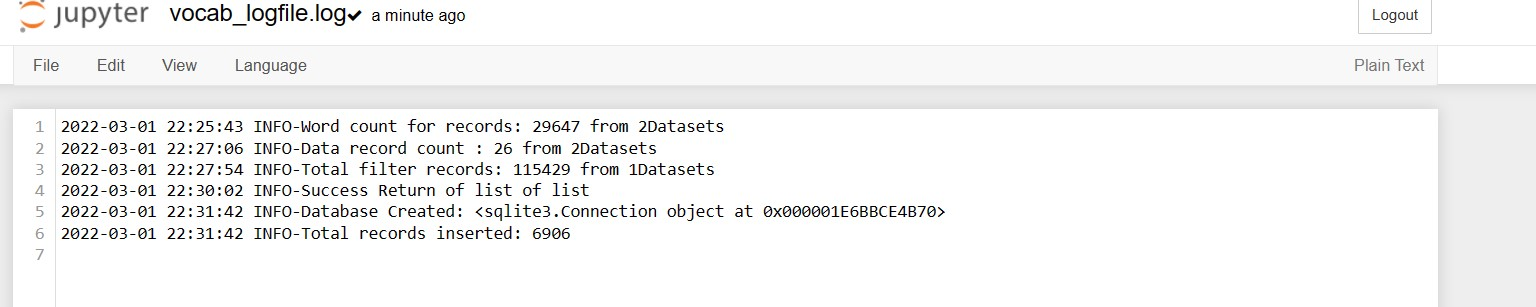

In [20]:
from IPython import display 
display.Image("./vocab_logfile.jpg")